## Setup Data

In [1]:
import cv2
import json
from matplotlib import pyplot as plt
import numpy as np
import os
import random

# import a lot of things from keras:
# sequential model
from keras.models import Sequential

# layers
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, RandomFlip, RandomRotation, RandomContrast, RandomBrightness

# loss function
from keras.metrics import categorical_crossentropy

# callback functions
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# convert data to categorial vector representation
from keras.utils import to_categorical

# nice progress bar for loading data
from tqdm.notebook import tqdm

# helper function for train/test split
from sklearn.model_selection import train_test_split

# import confusion matrix helper function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# include only those gestures
CONDITIONS = ['like','dislike','stop']

# image size
IMG_SIZE = 64
SIZE = (IMG_SIZE, IMG_SIZE)

# number of color channels we want to use
# set to 1 to convert to grayscale
# set to 3 to use color images
COLOR_CHANNELS = 3

annotations = dict()

for condition in CONDITIONS:
    with open(f'_annotations/{condition}.json') as f:
        annotations[condition] = json.load(f)
        
def preprocess_image(img):
    if COLOR_CHANNELS == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img, SIZE)
    return img_resized

images = [] # stores actual image data
labels = [] # stores labels (as integer - because this is what our network needs)
label_names = [] # maps label ints to their actual categories so we can understand predictions later

# loop over all conditions
# loop over all files in the condition's directory
# read the image and corresponding annotation
# crop image to the region of interest
# preprocess image
# store preprocessed image and label in corresponding lists
for condition in CONDITIONS:
    for filename in tqdm(os.listdir(condition)):
        # extract unique ID from file name
        UID = filename.split('.')[0]
        img = cv2.imread(f'{condition}/{filename}')
        
        # get annotation from the dict we loaded earlier
        try:
            annotation = annotations[condition][UID]
        except Exception as e:
            print(e)
            continue
        
        # iterate over all hands annotated in the image
        for i, bbox in enumerate(annotation['bboxes']):
            # annotated bounding boxes are in the range from 0 to 1
            # therefore we have to scale them to the image size
            x1 = int(bbox[0] * img.shape[1])
            y1 = int(bbox[1] * img.shape[0])
            w = int(bbox[2] * img.shape[1])
            h = int(bbox[3] * img.shape[0])
            x2 = x1 + w
            y2 = y1 + h
            
            # crop image to the bounding box and apply pre-processing
            crop = img[y1:y2, x1:x2]
            preprocessed = preprocess_image(crop)
            
            # get the annotated hand's label
            # if we have not seen this label yet, add it to the list of labels
            label = annotation['labels'][i]
            if label not in label_names:
                label_names.append(label)
            
            label_index = label_names.index(label)
            
            images.append(preprocessed)
            labels.append(label_index)
            
            
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


X_train = np.array(X_train).astype('float32')
X_train = X_train / 255.

X_test = np.array(X_test).astype('float32')
X_test = X_test / 255.

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

train_label = y_train_one_hot
test_label = y_test_one_hot

X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, COLOR_CHANNELS)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, COLOR_CHANNELS)

print(X_train.shape, X_test.shape, train_label.shape, test_label.shape)

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

776
195
776
195
(776, 64, 64, 3) (195, 64, 64, 3) (776, 4) (195, 4)


Epoch 1/50


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.2660 - loss: 1.3815 - val_accuracy: 0.2667 - val_loss: 1.3622 - learning_rate: 0.0010
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3301 - loss: 1.3621 - val_accuracy: 0.4051 - val_loss: 1.2929 - learning_rate: 0.0010
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4559 - loss: 1.2277 - val_accuracy: 0.5949 - val_loss: 0.9783 - learning_rate: 0.0010
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6098 - loss: 0.9571 - val_accuracy: 0.7231 - val_loss: 0.7349 - learning_rate: 0.0010
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6981 - loss: 0.7872 - val_accuracy: 0.8769 - val_loss: 0.4855 - learning_rate: 0.0010
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7657 - loss: 0.6388 - val_accuracy: 0.8615 - val_loss: 0.4648 - learning_rate: 0.0010
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8082 - loss: 0.5833 - val_accuracy: 0.89

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (8, 64, 64, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast_1               │ (8, 64, 64, 3)         │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (8, 64, 64, 64)        │        15,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (8, 16, 16, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (8, 16, 16, 32)        │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (8, 6, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (8, 6, 6, 32)          │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (8, 3, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (8, 3, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (8, 288)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (8, 64)                │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (8, 64)                │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (8, 4)                 │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,038 (1.13 MB)

 Trainable params: 99,012 (386.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 198,026 (773.54 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
before [[9.95521545e-01 3.95261776e-03 1.69382023e-04 3.56499775e-04]
 [2.28549773e-03 5.92725119e-03 1.79505367e-02 9.73836720e-01]
 [9.98727739e-01 7.70559942e-04 2.21924188e-06 4.99427144e-04]
 [9.99846816e-01 1.32628425e-04 2.94073121e-08 2.05290962e-05]
 [9.99714673e-01 1.69011924e-04 2.39822366e-05 9.23050175e-05]
 [5.51519115e-05 6.29057058e-06 6.99475524e-04 9.99239087e-01]
 [1.88460480e-02 2.18234825e-04 3.39405269e-05 9.80901837e-01]
 [6.12960802e-03 9.21736717e-01 5.44303954e-02 1.77032202e-02]
 [9.80678380e-01 1.25123309e-02 1.21000281e-04 6.68830797e-03]
 [2.70623968e-05 7.95298163e-03 9.92009878e-01 1.00322623e-05]
 [1.66113663e-03 9.87501860e-01 1.01619074e-02 6.75081159e-04]
 [5.05711138e-01 3.09609771e-01 1.18501578e-03 1.83494002e-01]
 [9.98623013e-01 2.02299736e-04 1.55677196e-06 1.17318949e-03]
 [9.99187291e-01 5.51833829e-04 4.55952249e-06 2.56314233e-04]
 [2.60351300e-07 2.99229632e-05 9.99952316e-01 1.74727775e-05]
 [9.999663

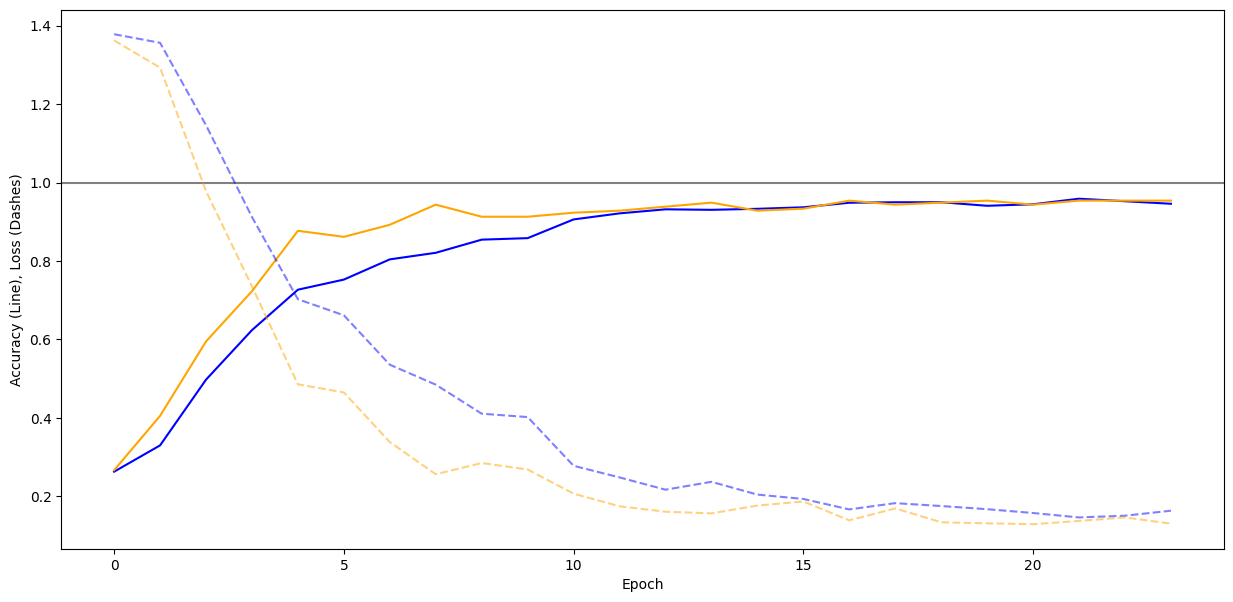

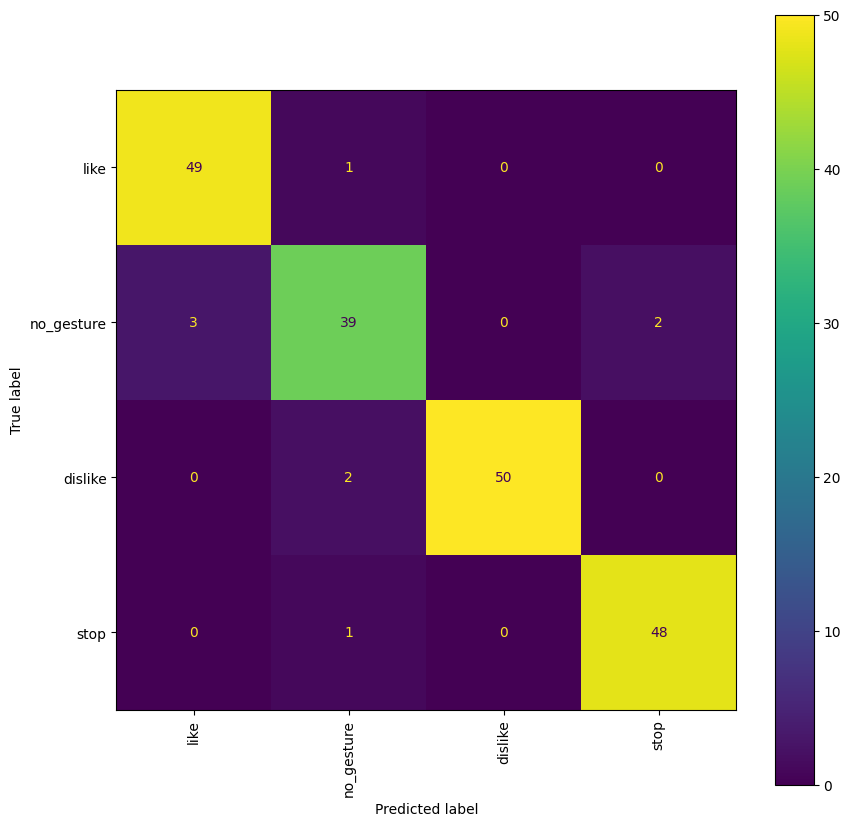

In [3]:

# variables for hyperparameters
batch_size = 8
epochs = 50
num_classes = len(label_names)
activation = 'relu'
activation_conv = 'relu'  # LeakyReLU
activation_hyperParam = 'relu'
layer_count = 2
num_neurons = 64

# define model structure
# with keras, we can use a model's add() function to add layers to the network one by one
model_1 = Sequential()

# data augmentation (this can also be done beforehand - but don't augment the test dataset!)
model_1.add(RandomFlip('horizontal'))
model_1.add(RandomContrast(0.1))
#model.add(RandomBrightness(0.1))
#model.add(RandomRotation(0.2))

# first, we add some convolution layers followed by max pooling
model_1.add(Conv2D(64, kernel_size=(9, 9), activation=activation_conv, input_shape=(SIZE[0], SIZE[1], COLOR_CHANNELS), padding='same'))
model_1.add(MaxPooling2D(pool_size=(4, 4), padding='same'))

model_1.add(Conv2D(32, (5, 5), activation=activation_conv, padding='same'))
model_1.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model_1.add(Conv2D(32, (3, 3), activation=activation_conv, padding='same'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# dropout layers can drop part of the data during each epoch - this prevents overfitting
model_1.add(Dropout(0.2))

# after the convolution layers, we have to flatten the data so it can be fed into fully connected layers
model_1.add(Flatten())

# add some fully connected layers ("Dense")
for i in range(layer_count - 1):
    model_1.add(Dense(num_neurons, activation=activation_hyperParam))

model_1.add(Dense(num_neurons, activation=activation_hyperParam))

# for classification, the last layer has to use the softmax activation function, which gives us probabilities for each category
model_1.add(Dense(num_classes, activation='softmax'))

# specify loss function, optimizer and evaluation metrics
# for classification, categorial crossentropy is used as a loss function
# use the adam optimizer unless you have a good reason not to
model_1.compile(loss=categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

# define callback functions that react to the model's behavior during training
# in this example, we reduce the learning rate once we get stuck and early stopping
# to cancel the training if there are no improvements for a certain amount of epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
stop_early = EarlyStopping(monitor='val_loss', patience=3)


#training the model
history_1 = model_1.fit(
    X_train,
    train_label,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, test_label),
    callbacks=[reduce_lr, stop_early]
)


model_1.save('3_value_model.h5')

# let's have a look at our model
model_1.summary()



#Plotting the Progress
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
accuracy = history_1.history['accuracy']
val_accuracy = history_1.history['val_accuracy']
fig = plt.figure(figsize=(15, 7))
ax = plt.gca()

ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy (Line), Loss (Dashes)')

ax.axhline(1, color='gray')

plt.plot(accuracy, color='blue')
plt.plot(val_accuracy, color='orange')
plt.plot(loss, '--', color='blue', alpha=0.5)
plt.plot(val_loss, '--', color='orange', alpha=0.5)



#matrix
# let the model make predictions for our training data
y_predictions_1 = model_1.predict(X_test)

# we get a 2D numpy array with probabilities for each category
print('before', y_predictions_1)

# to build a confusion matrix, we have to convert it to classifications
# this can be done by using the argmax() function to set the probability to 1 and the rest to 0
y_predictions_1 = np.argmax(y_predictions_1, axis=1)

print('probabilities', y_predictions_1)

# create and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_predictions_1)

fig = plt.figure(figsize=(10, 10))

ConfusionMatrixDisplay(conf_matrix, display_labels=label_names).plot(ax=plt.gca())

plt.xticks(rotation=90, ha='center')


pass
